In [1]:
import tensorflow as tf
import sys
import numpy as np

np.random.seed(1)
DIMS = 2
INPUTS_NBR = 50

/Users/Sylvain/.pyenv/versions/3.6.4/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
R = tf.Variable(tf.random_normal([], mean=10, dtype=tf.float64), dtype=tf.float64, name="Radius")
a = tf.Variable(tf.random_normal([DIMS], mean=5, dtype=tf.float64), dtype=tf.float64, name="Center")

loss = tf.cast(tf.reduce_sum(tf.square(R)), tf.float64)
inputs = np.random.normal(3*np.ones(DIMS), scale=1, size=(INPUTS_NBR, DIMS))

In [3]:
constraints = [tf.cast(tf.square(R)-tf.square(tf.norm(inputs[i] - a)), tf.float64) for i in range(inputs.shape[0])]

In [4]:
optimizer = tf.contrib.opt.ScipyOptimizerInterface(loss, 
    method="SLSQP",
    inequalities=constraints,
    options={
     'maxiter': 100
})

with tf.Session() as sess:
    
    sess.run(tf.global_variables_initializer())
    
    print("Avant")
    R1, a1 = sess.run([R, a])
    print(R1, a1)
    
    train = optimizer.minimize(sess)
    
    print("Après")
    R1, a1 = sess.run([R, a])
    print(R1, a1)

Avant
10.533780418765401 [5.5437378  6.97411984]
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: 4.957682
  Number of iterations: 8
  Number of functions evaluations: 8
Après
2.2265853118958874 [3.52816185 2.89935827]


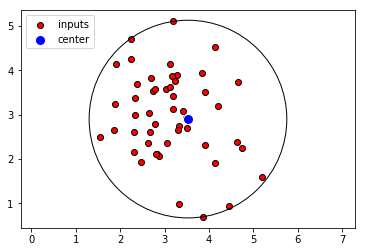

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

xx, yy = np.meshgrid(np.linspace(-5, 5, 500), np.linspace(-5, 5, 500))

fig = plt.gcf()
ax = fig.gca()

s1 = plt.scatter(inputs[:, 0], inputs[:, 1], c='red', edgecolors='k')
s2 = plt.scatter(a1[0], a1[1], c='blue', s=100, edgecolors='w')
c = plt.Circle(tuple(a1), R1, fill=False)
ax.add_patch(c)

plt.axis('equal')

plt.legend([s1, s2],
           ["inputs", "center"],
           loc="upper left")
plt.show()